# Chapter 2: OOP

# Reinforcement

## R-2.4
Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its number of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.

In [29]:
class Flower:
    def __init__(self, name: str, petals: int, price: float):
        self._name = name
        self._petals = petals
        self._price = price
    
    def getName(self):
        return self._name
    
    def getPetals(self):
        return self._petals
    
    def getPrice(self):
        return self._price

a = Flower("rose", 2, 3)
a.getName()


'rose'

## R-2.5 
Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.

In [30]:
class CreditCard:
    def __init__ (self, customer, bank, acnt, limit):
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
    
    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank
    
    def get_acnt(self):
        return self._acnt
    
    def get_limit(self):
        return self._limit
    
    def get_balance(self):
        return self._balance
    
    def charge(self, price):
        if type(price) != int:
            raise TypeError("ngu1")
        
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        if type(amount) != int:
            raise TypeError("ngu2")
        self._balance -= amount

a = CreditCard("John Bowman" , "California Savings" , "56 5391 0375 9387 5309" , 2000)
print(a.make_payment(400))
print(a.get_balance())

None
-400


## R-2.6 
If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.

In [31]:
class R26(CreditCard):
    def make_payment(self, price):
        super().make_payment(price)
        if price < 0:
            return ValueError("hong co am")

b = R26("John Bowman" , "California Savings" , "56 5391 0375 9387 5309" , 2000)
print(b.make_payment(-1))


hong co am


## R-2.7 
The CreditCard class of Section 2.3 initializes the balance of a new account to zero. Modify that class so that a new account can be given a
nonzero balance using an optional fifth parameter to the constructor. The
four-parameter constructor syntax should continue to produce an account
with zero balance.

In [32]:
class R27(CreditCard):
    def __init__(self, customer, bank, acnt, limit, balance):
        super().__init__(customer, bank, acnt, limit)
        self._balance = balance

b = R27("John Bowman" , "California Savings" , "56 5391 0375 9387 5309" , 2000, 5)
b.get_balance()

5

## R-2.8 
Modify the declaration of the first for loop in the CreditCard tests, from
Code Fragment 2.3, so that it will eventually cause exactly one of the three
credit cards to go over its credit limit. Which credit card is it?

In [33]:
class R28(CreditCard):
    def charge(self, price):
        super().charge(price)
        if price + self._balance > self._limit:
            self._limit = 0
            return False
        else:
            self._balance += price
            return True
        

wallet = [ ]
wallet.append(R28( "John Bowman" , "California Savings" , "5391 0375 9387 5309" , 2500) )
wallet.append(R28( "John Bowman" , "California Federal" , "3485 0399 3395 1954" , 3500) )
wallet.append(R28( "John Bowman" , "California Finance" , "5391 0375 9387 5309" , 5000) )

for val in range(1, 42):
    wallet[0].charge(val)
    wallet[1].charge(2*val)
    wallet[2].charge(3*val)

for c in range(3):
    print("Customer =", wallet[c].get_customer())
    print("Bank =", wallet[c].get_bank())
    print("Account =", wallet[c].get_acnt())
    print("Limit =", wallet[c].get_limit())
    print("Balance =", wallet[c].get_balance())
    while wallet[c].get_balance() > 100:
        wallet[c].make_payment(100)
    print("New balance =", wallet[c].get_balance(), "\n")
    

Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 1722
New balance = 22 

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 3444
New balance = 44 

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 0
Balance = 4920
New balance = 20 



## R-2.9 
Implement the sub method for the Vector class of Section 2.3.3, so
that the expression u−v returns a new vector instance representing the
difference between two vectors.

In [34]:
class Vector:
    """Represent a vector in a multidimensional space."""
    
    def __init__(self, dimension):
        """Initialize a vector with zeros in all dimensions."""
        self._coords = [0] * dimension
    
    # def getHuh(self):
    #     return self._coords

    def __len__(self):
        """Return the number of dimensions in the vector."""
        return len(self._coords)
    
    def __getitem__(self, index):
        """Access the element at the specified index."""
        return self._coords[index]
    
    def __setitem__(self, index, value):
        """Set the element at the specified index."""
        self._coords[index] = value
    
    def __str__(self):
        return  '<' + str(self._coords)[1:-1] + '>'

    def __add__(self, other):
        """Add two vectors element-wise."""
        if len(self) != len(other):
            raise ValueError("Vectors must have the same dimensions")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] + other[i]
        return result

    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError("Vectors must have the same dimensions")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] - other[i]
        return result

# Example usage:
v = Vector(5)  # Create a 5-dimensional vector
i = Vector(5)  # Create a 5-dimensional vector
v[1] = 23      # Set an element
i[1] = 40 
print(v[4])    # Access an element
u = v + v      # Vector addition
print(u)       # Prints <0, 46, 0, 0, 90>
u = v - i
print(u)


0
<0, 46, 0, 0, 0>
<0, -17, 0, 0, 0>


## R-2.10 
Implement the __ neg__ method for the Vector class of Section 2.3.3, so
that the expression −v returns a new vector instance whose coordinates
are all the negated values of the respective coordinates of v.

In [35]:
class Vector(Vector):
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result 
    
v = Vector(5)
v[3]=4
v[4]=-3
print(-v)

<0, 0, 0, -4, 3>


## R-2.11 
In Section 2.3.3, we note that our Vector class supports a syntax such as
v = u + [5, 3, 10, −2, 1], in which the sum of a vector and list returns
a new vector. However, the syntax v = [5, 3, 10, −2, 1] + u is illegal.
Explain how the Vector class definition can be revised so that this syntax
generates a new vector.

In [36]:
class Vector(Vector):
    def __radd__(self, other):
        return self.__add__(other)

u = Vector(5)
u[1] = 46
v = [5, 3, 10, -2, 1] + u
print(v)  # Output should be [5, 49, 10, -2, 1]

<5, 49, 10, -2, 1>


## R-2.12 & R-2.13
Implement the mul method for the Vector class of Section 2.3.3, so
that the expression v*3 returns a new vector with coordinates that are 3
times the respective coordinates of v.

In [37]:
class Vector(Vector):
    def __mul__(self, num):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = num * self[i]
        return result
    
    def __rmul__(self, other):
        return self.__mul__(other)

v = Vector(5)
v[2]=12
v[1]=-9
print(v*3)
print(u)

<0, -27, 36, 0, 0>
<0, 46, 0, 0, 0>


## R-2.14  
Implement the mul method for the Vector class of Section 2.3.3, so
that the expression u*v returns a scalar that represents the dot product of
the vectors, that is, $\sum_{i=1}^{n} u_i \cdot v_i $




In [38]:
class Vector(Vector):
    def append(self, other: list):
        self._coords += other
        
    def __mul__(self, other):
        if type(other) == int:
            return super().__mul__(other)
        else:
            result = 0
            if len(self) != len(other):
                gap = abs(len(self) - len(other))
                if len(self) < len(other):
                    while gap != 0:
                        self.append([0])
                        gap -= 1
                else:
                    while gap != 0:
                        other.append([0])
                        gap -= 1
            for i in range(len(self)):
                result += (self[i] * other[i])
            return result

In [39]:
v = Vector(5)
u = Vector(3)
v[2]=12
v[1]=-9
v[0]=3

u[2]=2
u[1]=-7
v[4]=0
print(v)
print(u)

<3, -9, 12, 0, 0>
<0, -7, 2>


In [40]:
ef = v*3
print(ef)

<9, -27, 36, 0, 0>


## R-2.15 
Modify the constructor so that either of these forms is
acceptable; that is, if a single integer is sent, it produces a vector of that
dimension with all zeros, but if a sequence of numbers is provided, it produces a vector with coordinates based on that sequence.

In [41]:
class Vector(Vector):
    def __init__(self, dimension):
        if type(dimension) == int:
            super().__init__(dimension)
        elif type(dimension) == list or dict or set:
            self._coords = dimension
        else:
            raise ValueError("Invalid dimension type")

v = Vector(5)
u = Vector([2,3,4])
print(v, u)


<0, 0, 0, 0, 0> <2, 3, 4>


## R-2.16
Our Range class, from Section 2.3.5, relies on the formula __max(0, (stop − start + step − 1) // step)__
to compute the number of elements in the range. It is not immediately evident why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

In [42]:
class Range:
    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance.
        
        Semantics is similar to the built-in range class.
        """
        if step == 0:
            raise ValueError("step cannot be 0")
        
        if stop is None:  # special case of range(n)
            start, stop = 0, start  # should be treated as if range(0, n)
        
        # calculate the effective length once
        self.length = max(0, (stop - start + step - 1) // step)
        
        # need knowledge of start and step (but not stop) to support getitem
        self.start = start
        self.step = step
        
    def __len__(self):
        """Return number of entries in the range."""
        return self.length
    
    def __getitem__(self, k):
        """Return entry at index k (using standard interpretation if negative)."""
        if k < 0:
            k += len(self)  # attempt to convert negative index
        
        if not 0 <= k < self.length:
            raise IndexError("index out of range")
        
        return self.start + k * self.step



## R-2.17 
Draw a class inheritance diagram for the following set of classes:
- Class Goat extends 'object' and adds an instance variable _tail and
methods milk( ) and jump( ).
- Class Pig extends 'object' and adds an instance variable _nose and
methods eat(food) and wallow( ).
- Class Horse extends 'object' and adds instance variables _height and
_color, and methods run( ) and jump( ).
- Class Racer extends Horse and adds a method race( ).
- Class Equestrian extends Horse, adding an instance variable _weight
and methods trot( ) and is_trained( ).

In [43]:
class Goat(object):
    def __init__(self, tail):
        self._tail = tail
    
    def milk():
        pass
    
    def jump():
        pass

class Pig(object):
    def __init__(self, nose):
        self._nose = nose

    def eat(food: str):
        return food
    
    def wallow():
        pass

class Horse(object):
    def __init__(self, height, color):
        self._height = height
        self._color = color
    
    def run():
        pass
    
    def jump():
        pass

class Racer(Horse):
    def race():
        pass

class Equestrian(Horse):
    def __init__(self, height, color, weight):
        super().__init__(height, color)
        self._weight = weight

## R-2.18
Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [44]:
class Progression:
    def __init__(self, start=0):
        self._current = start

    def _advance(self):
        self._current +=1
    
    def __next__(self):
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
        
    def __iter__(self):
        return self
    
    def print_progression(self, n):
        print(' '.join(str(next(self)) for j in range(n))) 

class Fibonacci(Progression):
    def __init__(self, start=0, follow=1):
        super().__init__(start)
        self._previous = follow - start
    
    def _advance(self):
        self._previous, self._current = self._current, self._previous + self._current


In [45]:
print( 'Fibonacci progression with default start values:' )
Fibonacci(2,2).print_progression(8)

Fibonacci progression with default start values:
2 2 4 6 10 16 26 42


## R-2.19 
When using the ArithmeticProgression class of Section 2.4.2 with an increment of 128 and a start of 0, how many calls to next can we make
before we reach an integer of $2^{63}$ or larger?

> ___Answer:___ To find the number of calls needed, we solve the following inequality:

$ \text{current value} + n \times \text{increment} \geq 2^{63} $

Substituting the given values:

$ 256 + 128n \geq 2^{63} $

Solving for (n):

$ n \geq \frac{2^{63} - 256}{128} $

Calculating this expression:

$ n \geq 2^{55} - 2 $


## R-2.20 
What are some potential efficiency disadvantages of having very deep inheritance trees, that is, a large set of classes, A, B, C, and so on, such that
B extends A, C extends B, D extends C, etc.?

> ___Answer:___

__1.__ _Method Dispatch Overhead:_

In deep inheritance hierarchies, method calls can become less efficient due to the need for runtime method dispatch. When a method is invoked on an object, the runtime must traverse the entire inheritance chain to find the appropriate implementation.

__2.__ _Constructor Chain and Super Calls:_

Constructors in derived classes often invoke the constructor of their parent class using supe().
In deep inheritance trees, this chain of constructor calls can become lengthy, leading to potential performance overhead.

__3.__ _Increased Memory Usage:_

Each level of inheritance introduces additional memory overhead.
Objects of derived classes carry the data members of their parent classes as well.
In deep hierarchies, memory usage can accumulate significantly.


## R-2.21 
What are some potential efficiency disadvantages of having very shallow
inheritance trees, that is, a large set of classes, A, B, C, and so on, such
that all of these classes extend a single class, Z?

> ___Answer:___

__1.__ _Code Duplication:_

Shallow inheritance trees can lead to code duplication.
If multiple classes share common functionality, they may reimplement the same methods or attributes inherited from class Z.
This redundancy increases maintenance effort and can introduce inconsistencies.

__2.__ _Difficulty in Code Maintenance:_

With many classes extending a single base class, changes to the base class can impact all derived classes.
Ensuring consistent behavior across all subclasses becomes challenging.
Debugging and maintaining such code can be cumbersome.

__3.__ _Reduced Flexibility and Abstraction:_

Shallow inheritance limits the flexibility to create specialized subclasses.
It may be harder to model specific behaviors or variations.
Hierarchies with deeper inheritance allow for more fine-grained specialization.

__4.__ _Inefficient Use of Memory:_

Each instance of a derived class carries the data members inherited from class Z.
If these members are not relevant to all subclasses, memory usage becomes inefficient.
In contrast, deeper hierarchies allow more targeted data sharing.


## R-2.22 & R-2.23 
The collections.Sequence abstract base class does not provide support for
comparing two sequences to each other. Modify our Sequence class from
Code Fragment 2.14 to include a definition for the __eq __ method, so
that expression seq1 == seq2 will return True precisely when the two
sequences are element by element equivalent.

In similar spirit to the previous problem, augment the Sequence class with
method __
lt__ , to support lexicographic comparison seq1 < seq2.

In [46]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):
    def __init__(self, seq):
        self._seq = seq
    
    def __len__(self):
        """Return the number of dimensions in the vector."""
        return len(self._seq)
    
    def __getitem__(self, index):
        """Access the element at the specified index."""
        return self._seq[index]

    def __contains__(self, val):
        for j in range(len(self)):
            if self[j] == val:
                return True
        return False
    
    def __eq__(self, val) -> bool:
        if len(self) != len(val):
            raise ValueError('Two objects must have equal lenght')
        for i in range(len(self)):
            if self[i] != val[i]:
                return False
        return True
    
    def __lt__(self, val):
        if len(self) != len(val):
            return True if len(self) < len(val) else False
        else:
            for i in range(len(self)):
                if self[i] > val[i]:
                    return False
            return True

    def index(self, val):
        for j in range(len(self)):
            if self[j] == val:
                return j
        raise ValueError('value not in sequence')
    
    def count(self, val):
        k = 0
        for j in range(len(self)):
            if self[j] == val:
                k += 1
        return k

In [47]:
# Create two sequences
seq1 = Sequence(['b','gewrwerew','x'])
seq2 = Sequence(['b','g','x'])

# Check if they are equal
result = seq1 < seq2

print(f"Are seq1 less than seq2 equal? {result}")


Are seq1 less than seq2 equal? False


# Creativity

## C-2.24 
Suppose you are on the design team for a new e-book reader. What are the
primary classes and methods that the Python software for your reader will
need? You should include an inheritance diagram for this code, but you
do not need to write any actual code. Your software architecture should
at least include ways for customers to buy new books, view their list of
purchased books, and read their purchased books.

class Books: 
- id, name, author, price, content
- getname, getauthor, getprice, getcontent

class Customer:
- id, name, purchased
- buybook(book), viewbooks, readbook(book)

class EBookReader (inherits from Customer):
- available_books
- add_book(book), display_available_books(), read_purchased_book(book)

## C-2.25 
Exercise R-2.12 uses the mul method to support multiplying a Vector
by a number, while Exercise R-2.14 uses the mul method to support
computing a dot product of two vectors. Give a single implementation of
Vector. mul that uses run-time type checking to support both syntaxes
u v and u k, where u and v designate vector instances and k represents
a number. [R-2.14](#r-214)

## C-2.26 
The SequenceIterator class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named ReversedSequenceIterator that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.
[R-2.22 & R-2.23](#r-212--r-213)

In [48]:

class ReversedSequenceIterator:
    def __init__(self, seq):
        self._seq = seq
        self._k = len(self._seq)
    
    def __next__(self):
        self._k -= 1
        if self._k > -1:
            return(self._seq[self._k])
        else:
            raise StopIteration("bruh out of index hehe")
    
    def __iter__(self):
        return self

In [49]:
a =ReversedSequenceIterator(['a','b','c','e','oew'])
for i in range(5):
    print(next(a))


oew
e
c
b
a


## C-2.27 
In Section 2.3.5, we note that our version of the Range class has implicit support for iteration, due to its explicit support of both len
and getitem . The class also receives implicit support of the Boolean
test, “k in r” for Range r. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test
2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
more efficient implementation of the contains method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

## C-2.28 
The PredatoryCreditCard class of Section 2.4.1 provides a process_month
method that models the completion of a monthly cycle. Modify the class
so that once a customer has made ten calls to charge in the current month,
each additional call to that function results in an additional $1 surcharge.

In [50]:
class PredatoryCreditCard(CreditCard):
    SURCHARGE = 1
    def __init__(self, customer, bank, acnt, limit):
        super().__init__(customer, bank, acnt, limit)
        self._month = 0 
        self._count = 0
    
    def get_month(self):
        return self._month
    
    def get_count(self):
        return self._count
        
    def process_month(self):
        charged_fee = 0
        if self._count > 10:
            charged_fee = PredatoryCreditCard.SURCHARGE * (self._count - 10)
        return charged_fee
    
    def charge(self, price, month):
        if month < 1 or month > 12:
            raise ValueError("bruhhhh how tf can u make a payment in a nonexisted month?????!!!!!!!!")
        if self._month == 0:
            self._month = month
            self._count = 1
        else:
            if self._month == month:
                self._count += 1
            else:
                self._month = month
                self._count = 1
        success = super().charge(price)
        if success:
            if self._count > 10:
                self._balance += PredatoryCreditCard.SURCHARGE
            return True


In [51]:
a = PredatoryCreditCard("John Bowman" , "California Savings" , "56 5391 0375 9387 5309" , 2000)
for i in range(20):
    a.charge(30, 12)

print(a.get_balance())
print(a.process_month())
print(a.get_count())

for i in range(19):
    a.charge(30, 1)

print(a.get_balance())
print(a.process_month())
print(a.get_count()) #???????????????????????????????????????/

610
10
20
1189
9
19


# Projects

## P-2.33
Write a Python program that inputs a polynomial in standard algebraic notation and outputs the first derivative of that polynomial.
if i could finish this problem, imma go cramming writing :()

In [52]:
class Polynomial:
    def __init__(self, deg):
        self._deg = deg
        self._com = [1] * (deg + 1)
    
    def __getitem__(self, index):
        return self._com[self._deg - index]
    
    def __setitem__(self, index, value):
        self._com[self._deg - index] = value

    def __len__(self):
        return len(self._com)
    
    def __str__(self):
        output = ''
        for i in range(self._deg + 1):
            if self._deg - i > 1:
                output += (f"{self._com[i]}x^{self._deg - i} + ")
            elif self._deg - i == 1 and self._deg - i != 0:
                output += (f"{self._com[i]}x + ")
            else:
                output += (f"{self._com[i]}")
        return output
    
    def first_der(self):
        result = Polynomial(self._deg - 1)
        for i in range(self._deg):
            result[self._deg - i - 1] = (self._deg - i) * self[self._deg - i]
        return result

In [53]:
num = int(input("Which degree a polynomial do you select: "))
a = Polynomial(num)
a[4]=3
a[3]=5
a[0]=0
print(f"Polynomial a at {num} degree: \na = {a}")

Polynomial a at 5 degree: 
a = 1x^5 + 3x^4 + 5x^3 + 1x^2 + 1x + 0


In [54]:
b = a.first_der()
print(b)

5x^4 + 12x^3 + 15x^2 + 2x + 1


In [55]:
c = b.first_der()
d = c.first_der()
print(d.first_der())

120x + 72


## P-2.34
Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each alphabet character that appears in
that document

Counter({'a': 28, 's': 26, ' ': 22, 'e': 14, 'v': 13, 'h': 12, 'u': 11, 'x': 11, '\n': 9, 'n': 9, 'c': 9, 'l': 9, 'd': 7, 't': 7, 'z': 7, 'o': 5, 'j': 5, 'i': 4, 'p': 4, 'k': 3, 'q': 3, 'y': 3, 'w': 3, 'g': 3, 'f': 2, 'b': 2})


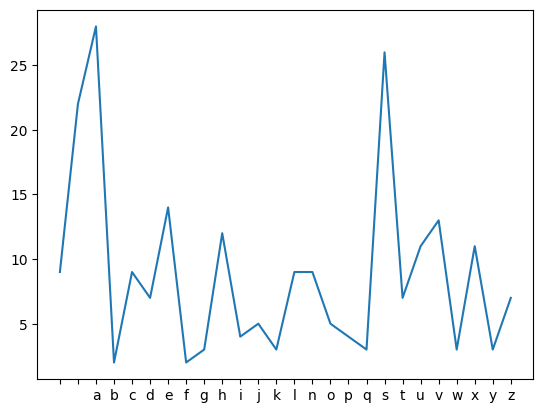

In [56]:
import matplotlib.pyplot as plt
from collections import Counter
import os

filename = "text.txt"
with open(filename, 'r') as file:
    lines = file.read()
    lines = lines.lower()
    counts=Counter(lines)
    for i in lines:
        counts[i]
    print(counts)
    myList = sorted(counts.items())
    x, y = zip(*myList)
    plt.plot(x, y)
    plt.show()

## P-2.35 
Write a set of Python classes that can simulate an Internet application in
which one party, Alice, is periodically creating a set of packets that she
wants to send to Bob. An Internet process is continually checking if Alice
has any packets to send, and if so, it delivers them to Bob’s computer, and
Bob is periodically checking if his computer has a packet from Alice, and,
if so, he reads and deletes it.

In [1]:
class Packet:
    def __init__(self, data):
        self.data = data

class InternetApplication:
    def __init__(self):
        self.alice_packets = []  # Packets created by Alice
        self.bob_packets = []    # Packets received by Bob

    def create_packet(self, data):
        packet = Packet(data)
        self.alice_packets.append(packet)

    def check_for_packets(self):
        if self.alice_packets:
            return True
        return False

    def deliver_packet_to_bob(self):
        if self.check_for_packets():
            packet = self.alice_packets.pop(0)  # Get the first packet
            self.bob_packets.append(packet)

    def check_bob_packets(self):
        if self.bob_packets:
            return True
        return False

    def read_and_delete_packet(self):
        if self.check_bob_packets():
            packet = self.bob_packets.pop(0)  # Get the first packet
            return packet.data
        return None

# Example usage:
internet_app = InternetApplication()
internet_app.create_packet("Hello, Bob! This is Alice.")
internet_app.deliver_packet_to_bob()

if internet_app.check_bob_packets():
    received_data = internet_app.read_and_delete_packet()
    print(f"Bob received: {received_data}")
else:
    print("No packets for Bob yet.")


Bob received: Hello, Bob! This is Alice.


Sure! Here's a set of instructions on how you can approach solving the problem without providing actual code:

1. **Identify the Objects**: First, identify the main objects involved in the simulation. In this case, you have Alice, Bob, and packets.

2. **Define Classes**: Create classes for Alice, Bob, and Packets. Think about what attributes and methods each class might need. For example:
   - Alice class: It should have a method to create packets.
   - Bob class: It should have a method to receive and read packets.
   - Packet class: It should represent the data packets that Alice sends to Bob. Think about what data or attributes a packet might need.

3. **Implement Packet Creation**: In the Alice class, implement a method that periodically creates packets. You might use a timer or some form of scheduling mechanism for this task.

4. **Implement Packet Delivery**: Create a process or mechanism that simulates the Internet process checking if Alice has any packets to send. If there are packets, deliver them to Bob's computer.

5. **Implement Packet Reception**: In the Bob class, implement a method that periodically checks if his computer has a packet from Alice. If there is a packet, Bob should read and delete it.

6. **Consider Concurrency**: Since Alice and Bob are performing actions periodically, you may need to consider using threading or asynchronous programming to handle their actions concurrently.

7. **Error Handling**: Think about how you will handle errors or edge cases, such as what happens if Alice creates a packet but the Internet process fails to deliver it to Bob.

8. **Testing and Debugging**: Once you've implemented the classes and the main logic, thoroughly test the simulation to ensure that packets are being created, delivered, received, and read as expected. Debug any issues that arise during testing.

By following these instructions, you should be able to create a set of Python classes that simulate the scenario described, allowing Alice to send packets to Bob over the simulated Internet application.